1
Selected implementations is: Zero-Noise Extrapolation
1
Selected overhead is: ['Circuit Depth']
Doing cir_0_zne summing.........
Doing cir_1_zne summing.........
Doing cir_2_zne summing.........
Doing cir_3_zne summing.........


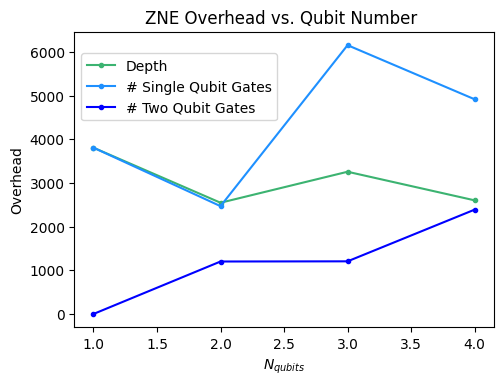

In [4]:
"""Dependencies
-customtkinter
-tkinter
-toml
-tomlkit
"""
#Gui for communicating stuff
# Credits to: https://github.com/TomSchimansky/CustomTkinter/blob/master/examples/complex_example.py
# Import necessary libraries
import customtkinter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk
import toml
import tomlkit
import executor_func_gui as exeFunc

# Define lists for error mitigation techniques and overhead
ErrorMitImps = ["Zero-Noise Extrapolation", "Clifford Data Regression", "Digital Dynamical Decoupling", "Probabilistic Error Cancellation",
                "Quantum subspace expansion", "Learning-based PEC", "Pauli twirling", "Readout error mitigation",
                "Robust shadow estimation"]
Overhead = ["Circuit Depth", "Number of Single Qubit Gates", "Number of Two Qubit Gates","Cost"]

# Set appearance mode and default color theme for customtkinter
customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
customtkinter.set_default_color_theme("green")  # Themes: "blue" (standard), "green", "dark-blue"

# Define the GUI application class
class appWindow(customtkinter.CTk):
    def __init__(self):
        super().__init__()

        # Configure window
        self.title("Mitigation Implementation")
        self.width = self.winfo_screenwidth()
        self.height = self.winfo_screenheight()
        self.geometry("%dx%d" % (self.width, self.height))

        # Configure grid layout (4x4)
        self.grid_columnconfigure(1, weight=1)
        self.grid_columnconfigure((2, 3), weight=0)
        self.grid_rowconfigure((0, 1, 2), weight=1)

        # Create tabview
        self.tabview = customtkinter.CTkTabview(self, width=10, height=500, anchor="w")
        self.tabview.grid(row=0, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.tabview.add("User Info")
        self.tabview.add("Graph")
        self.tabview.add("Tab 3")
        self.tabview.tab("Graph").grid_columnconfigure((0,1,2), weight=1)  # configure grid of individual tabs
        self.tabview.tab("User Info").grid_columnconfigure((0,1,2), weight=1)



        # Create label for Tab 2
        self.label_tab_2 = customtkinter.CTkLabel(self.tabview.tab("User Info"), text="Potato????",
                                                  font=customtkinter.CTkFont(size=40, weight="bold"))
        self.label_tab_2.grid(row=0, column=0, padx=20, pady=20)

        # #Textbox for tab 1
        # self.textbox = customtkinter.CTkTextbox(self.label_tab_2, width=250)
        # self.textbox.grid(row=0, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")

        # create main entry and button
        self.entry = customtkinter.CTkEntry(self.label_tab_2, placeholder_text="Azure ID:")
        self.entry.grid(row=3, column=1, columnspan=2, padx=(20, 0), pady=(20, 20), sticky="nsew")

        self.main_button_1 = customtkinter.CTkButton(master=self.label_tab_2, fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"))
        self.main_button_1.grid(row=3, column=3, padx=(20, 20), pady=(20, 20), sticky="nsew")



        # Load image for Tab 3
        # image = customtkinter.CTkImage(light_image=Image.open(r"C:\Users\ben10\Downloads\potato.jpg"), size=(30, 30))
        self.Image = customtkinter.CTkLabel(self.tabview.tab("Tab 3")) #, image=image

        # Create button for updating the graph
        self.sidebar_button_1 = customtkinter.CTkButton(self.tabview.tab("Graph"), text="Make Graph",
                                                        command=self.update_window)
        self.sidebar_button_1.grid(row=3, column=2, padx=20, pady=10)


        # Create sidebar frame with widgets
        self.sidebar_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=4, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(4, weight=1)
        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="MITIQ",
                                                  font=customtkinter.CTkFont(size=40, weight="bold"))
        self.logo_label.configure(text_color='yellow')
        self.logo_label.grid(row=0, column=0, padx=20, pady=(20, 10))



        defaultMode = customtkinter.CTkSwitch(self.sidebar_frame, text="Default Mode")
        defaultMode.grid(row=4, column=0, padx=20, pady=(10, 0))

        # Widgets for appearance mode and UI scaling
        self.appearance_mode_label = customtkinter.CTkLabel(self.sidebar_frame, text="Appearance Mode:", anchor="w")
        self.appearance_mode_label.grid(row=5, column=0, padx=20, pady=(10, 0))
        self.appearance_mode_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["Light", "Dark", "System"],
                                                                       command=self.change_appearance_mode_event)
        self.appearance_mode_optionemenu.grid(row=6, column=0, padx=20, pady=(10, 10))
        self.scaling_label = customtkinter.CTkLabel(self.sidebar_frame, text="UI Scaling:", anchor="w")
        self.scaling_label.grid(row=7, column=0, padx=20, pady=(10, 0))
        self.scaling_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame,
                                                               values=["80%", "90%", "100%", "110%", "120%"],
                                                               command=self.change_scaling_event)
        self.scaling_optionemenu.grid(row=8, column=0, padx=20, pady=(10, 20))

        # Create scrollable frames for error implementations and overhead
        framesInGraphTab = 0
        framesInGraphTab, self.scrollable_frame_switches_implements = self.create_scrollable_frame(self.tabview.tab("Graph"), "Error Implementations", ErrorMitImps,framesInGraphTab)
        framesInGraphTab, self.scrollable_frame_switches_overhead = self.create_scrollable_frame(self.tabview.tab("Graph"), "Overhead", Overhead, framesInGraphTab)


        # Set default values
        self.appearance_mode_optionemenu.set("Dark")
        self.scaling_optionemenu.set("100%")
        self.scrollable_frame_switches_implements[0].select()
        self.scrollable_frame_switches_overhead[0].select()
        # self.textbox.insert("0.0", "AER User ID")


        # Plotting section
        self.plotSize = (self.width * .004, self.height * .005)
        # Ask to choose an implementation
        self.overhead_label = customtkinter.CTkLabel(self.tabview.tab("Graph"), text="Make Graph when ready", anchor="center")
        self.overhead_label.grid(row=0, column=2, padx=(20, 0), pady=(20, 0), sticky="nsew")

        self.update()

    # Method to update the graph
    def update_window(self):
        plt.close()
        
        switchesImp = self.get_selected_switches(self.scrollable_frame_switches_implements)
        switchesOver = self.get_selected_switches(self.scrollable_frame_switches_overhead)
        print(len(switchesImp))
        if len(switchesImp) == 0:
            # Ask to choose an implementation
            imp_label = customtkinter.CTkLabel(self.tabview.tab("Graph"), text="Please select an Implementation", anchor="center")
            imp_label.grid(row=0, column=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        elif len(switchesImp) == 1:
                print("Selected implementations is: " +str(switchesImp[0]))
                self.title = str(switchesImp[0])
        else:
             print("Need to add multi implementation graph option")

        print(len(switchesOver))
        if len(switchesOver) == 0:
            # Ask to choose an implementation
            overhead_label = customtkinter.CTkLabel(self.tabview.tab("Graph"), text="Please select an Overhead", anchor="center")
            overhead_label.grid(row=0, column=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        elif len(switchesOver) == 1:
                print("Selected overhead is: " +str(switchesOver))
                self.update_graph(str(switchesOver[0]),"Acurracy")
        else:
             print("Need to add multi-overhead graph option")

    def update_graph(self,tech = "", yaxis = ""):
        fig,ax = exeFunc.appBackend().plot_it(tech = tech, plotSize = self.plotSize, path_to_metadata='metadata.toml')
        ax.set_xlabel(r'$N_{qubits}$')
        ax.set_ylabel('Overhead')
        ax.set_title('ZNE Overhead vs. Qubit Number ')

        ax.legend(bbox_to_anchor=(0.5, 0.95))
        
        # # ax.title.set_text(self.title)
        # # ax.axis("on")
        # # ax.set_ylabel(yaxis)
        # # ax.set_xlabel(xaxis)
        canvas = FigureCanvasTkAgg(fig, self.tabview.tab("Graph"))
        canvas.draw()
        canvas.get_tk_widget().grid(row=0, column=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.sidebar_button_1.configure(text="Update Graph")
        self.update()

    # Method to handle appearance mode change event
    def change_appearance_mode_event(self, new_appearance_mode: str):
        customtkinter.set_appearance_mode(new_appearance_mode)

    # Method to handle UI scaling change event
    def change_scaling_event(self, new_scaling: str):
        new_scaling_float = int(new_scaling.replace("%", "")) / 100
        customtkinter.set_widget_scaling(new_scaling_float)

    # Method to create scrollable frame
    def create_scrollable_frame(self, parent, label_text, items, count):
        scrollable_frame = customtkinter.CTkScrollableFrame(parent, label_text=label_text, fg_color="purple")
        scrollable_frame.grid(row=0, column=count, padx=20, pady=20, columnspan=1, sticky="nsew")
        scrollable_frame.grid_columnconfigure(0, weight=1)
        scrollable_frame_switches = []
        for i, item in enumerate(items):
            switch = customtkinter.CTkSwitch(master=scrollable_frame, text=item)
            switch.grid(row=i, column=0, padx=10, pady=20)
            scrollable_frame_switches.append(switch)
        count = count +1
        return count, scrollable_frame_switches
        
            
    def get_selected_switches(self, switches):
        selected_switches = []
        for switch in switches:
            if switch.get():
                selected_switches.append(switch.cget("text"))
        return selected_switches
            
        

# Main function to run the application
if __name__ == "__main__":
    app = appWindow()
    app.mainloop()


In [12]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is DE10-A4EE

 Directory of c:\Users\ben10\Documents\AQET Capstone

04/17/2024  01:14 PM    <DIR>          .
04/01/2024  01:11 PM    <DIR>          ..
04/03/2024  10:02 AM             3,513 errorComparisonMitiq.ipynb
04/27/2024  11:14 AM            15,391 error_Comparison_Gui.ipynb
04/23/2024  10:20 AM                71 metadata.toml
               3 File(s)         18,975 bytes
               2 Dir(s)  19,909,181,440 bytes free


In [75]:
!jupyter nbconvert --to python executor_func_gui.ipynb 

[NbConvertApp] Converting notebook executor_func_gui.ipynb to python
[NbConvertApp] Writing 9637 bytes to executor_func_gui.py


In [76]:
from executor_func_gui import appBackend
appBackend().get_circ_bs_lists(4)

([<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1a0b932a610>,
 [[0], [1, 1], [1, 1, 1], [1, 0, 0, 0]],
 array([1, 2, 3, 4]))

In [74]:
appBackend().plotIt(tech="Zero-Noise Extrapolation", plotSize = (50,50), path_to_metadata = "metadata.toml")

AttributeError: 'appBackend' object has no attribute 'plotIt'

In [63]:
app

NameError: name 'plotSize' is not defined